In [1]:
DATA_PATH = '../data/'

In [103]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, r2_score
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [127]:
def wrangle(filepath):
    df = pd.read_csv(filepath, parse_dates= ['Year'], index_col= ['Year', 'Country'])
    # settings to display all columns
    pd.set_option("display.max_columns", None)
    # Dropping any Nan values
    df = df.dropna()
    # cleaning column names
    df.columns= ['Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']
    return df

    
df = wrangle(DATA_PATH+ 'Unit 2 project/led.csv')    

In [129]:
print(df.shape)
df.head(10)

(1649, 20)


,,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Year,Country,,,,,,,,,,,,,,,,,,,,
2015-01-01,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2014-01-01,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2013-01-01,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2012-01-01,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
2011-01-01,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
2010-01-01,Afghanistan,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
2009-01-01,Afghanistan,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
2008-01-01,Afghanistan,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
2007-01-01,Afghanistan,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4


In [130]:
df.isnull().sum()

Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1649 entries, (Timestamp('2015-01-01 00:00:00'), 'Afghanistan') to (Timestamp('2000-01-01 00:00:00'), 'Zimbabwe')
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   object 
 1   Life_Expectancy                  1649 non-null   float64
 2   Adult_Mortality                  1649 non-null   float64
 3   infant_deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage_expenditure           1649 non-null   float64
 6   Hepatitis_B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8   BMI                              1649 non-null   float64
 9   under_five_deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float

C:\Users\dburn\.virtualenvs\GitHub-83uqIelY\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


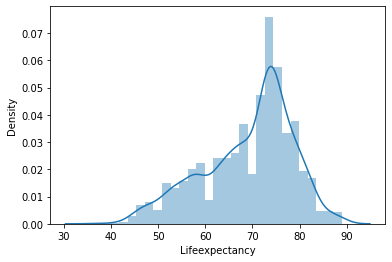

In [132]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [135]:
target = 'Life_Expectancy'
X = df.drop(columns= target)
y = df[target]

In [136]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42)

In [137]:
model = make_pipeline(
    TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)
print('Linear Regression R^2', model.score(X_val, y_val))

Linear Regression R^2 0.8031719262621922


In [138]:
ridge = make_pipeline(
    TargetEncoder(),  
    Ridge()
)

ridge.fit(X_train, y_train)
print('Linear Regression R^2', ridge.score(X_val, y_val))

Linear Regression R^2 0.8024556240790949


C:\Users\dburn\.virtualenvs\GitHub-83uqIelY\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.75532e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [154]:
model_xgb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    GradientBoostingRegressor()
)

model_xgb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Status'],
                                mapping=[{'col': 'Status',
                                          'data_type': dtype('O'),
                                          'mapping': Developing    1
Developed     2
NaN          -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [140]:
print('Gradient Boost Training Accuracy', model_xgb.score(X_train, y_train))
print('Gradient Boost Validation Accuracy', model_xgb.score(X_val, y_val))

Gradient Boost Training Accuracy 0.9665964867521087
Gradient Boost Validation Accuracy 0.9262072414814873


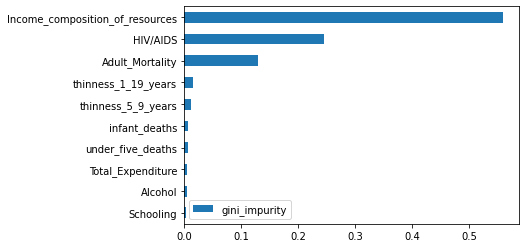

In [141]:
importances = model_xgb.named_steps['gradientboostingregressor'].feature_importances_

gini_imp = pd.DataFrame(data=importances, index=X_val.columns, columns=['gini_impurity']).sort_values(by='gini_impurity')

gini_imp.tail(10).plot(kind='barh');

In [151]:
gb = make_pipeline(
    OrdinalEncoder(), 
    XGBRegressor(n_estimators=300, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.9447605573210384


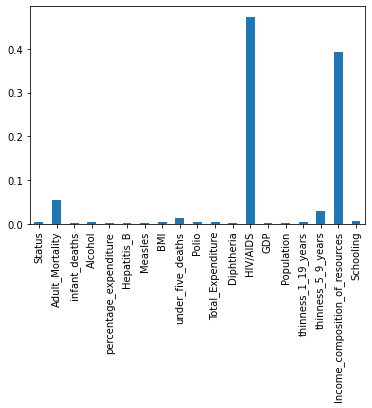

In [143]:
pd.Series(gb.named_steps['xgbregressor'].feature_importances_, index=X_val.columns).plot(kind='bar');

By far the most influential features in determing a country's life expectenancy are Adult Mortality, HIV/AIDS, and the Income Composition of Resoureces. The ranking of their importance may differ based on what model you fit but, these three features are still much more heavily weighted compared to any of the features below them 